# Exploratory Data Analysis on Billionaire Dataset

## Import the necessary python libraries

In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset into DataFrame

In [2]:
data = pd.read_csv('billionaires.csv')

## Explore the structure of the dataset using the shape, info() and head() commands

In [3]:
data.shape

(2614, 22)

- The billionaire dataset has 2614 rows and 22 columns

In [4]:
data.head(5)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


- **name**:     Name of the Billionaire                    
- **rank**:     Rank in a particular year                       
- **year**:     The year ranking was done                       
- **company.founded**:     Year the billionaire's company was found           
- **company.name**:        Name of billionaire's associated company           
- **company.relationship**:     The relationship of the billionaire with associated company       
- **company.sector**:     The sector of the company associated with the billionaire            
- **company.type** :     The company type associated with the company         
- **demographics.age**:     The billionaire's age at the year of ranking         
- **demographics.gender** :     The Gender of the billionaire      
- **location.citizenship**:     Billionaire's country of nationality      
- **location.country code**:     Country code   
- **location.gdp** :      Location GDP of the company associated with the billionaire             
- **location.region** :     Region where the billionaire's associated company is situated.          
- **wealth.type**  :     Whether the billionaire founded the business or not             
- **wealth.worth in billions**:     The billionaire network is billion dollars 
- **wealth.how.category** :     The category of the company associated with the billionaire       
- **wealth.how.from emerging** :     Is the company from an emerging sector or not 
- **wealth.how.industry** :     The industry the billionaire's company belongs to      
- **wealth.how.inherited**:     Whether the billionaire inherited the company or not       
- **wealth.how.was founder** :    Whether the billionaire found the comppany or not  
- **wealth.how.was political** :     Whether the billionaire is associated with Politics 


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

### The info() command returned the summary of the dataset with regards to column_name, data_type, and number of non-null values.

- Any column with the same non-value as entries does not contain a mssing value

- The dataset contains bool(3) dtype columns, float(2) dtype columns, int64(4) dtype columns, and object(13) dtype.

# Data Pre-processing

### Data cleaning involves the following procedures and actions;
- Missing or Null values identification and imputation
- Outliers identifications and removal
- Invalid or inconsistent entries
- Identification and deletion of duplicate values
- Change inconsistent column datatype

# Missing Values Identification

In [6]:
data.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

- 

In [7]:
data[['company.founded','company.name', 'company.relationship', 'company.sector', 'company.type', 'wealth.type']].notnull().head(2)

,company.founded,company.name,company.relationship,company.sector,company.type,wealth.type
0,True,True,True,True,True,True
1,True,True,True,True,True,True


## Data Imputation.

- On a close inspection of the null values which are categorical variables, one can deduce that majority of the null values emanted from the billionaires without any company associated with them.

- Instead of dropping the columns or rows using the `.dropna()` method, the missing data can be filled with 'Not Applicable' using the `.fillna()` method, in order not to lose some important details of the dataset.

In [8]:
# Fill in the missing values in the 'Company.name' column with 'Not Applicable', using the fillna() command

data['company.name'].fillna('Not Applicable', inplace=True)

In [9]:
# Recheck for missing values

data['company.name'].isnull().sum()

0

### Repeat the process for other columns with missing values

In [10]:
# Data imputation for the "company.relationship" column

data['company.relationship'].fillna('Not_Applicable', inplace=True)

In [11]:
# Data imputation for the company.sector column

data['company.sector'].fillna('Not_Applicable', inplace=True)

In [12]:
# Data imputation for the company.type column

data['company.type'].fillna('Not_Applicable', inplace=True)

In [13]:
# Data imputation for the wealth.type column

data['wealth.type'].fillna('Not_Applicable', inplace=True)

In [14]:
# Data imputation for the demographic.gender column

data['demographics.gender'].fillna('Not_Given', inplace=True)

In [15]:
data['wealth.how.category'].fillna('Not_Provided')

0            New Sectors
1            New Sectors
2            New Sectors
3         Traded Sectors
4         Traded Sectors
              ...       
2609      Traded Sectors
2610      Traded Sectors
2611           Financial
2612    Resource Related
2613         New Sectors
Name: wealth.how.category, Length: 2614, dtype: object

In [16]:
data.isnull().sum()

name                        0
rank                        0
year                        0
company.founded             0
company.name                0
company.relationship        0
company.sector              0
company.type                0
demographics.age            0
demographics.gender         0
location.citizenship        0
location.country code       0
location.gdp                0
location.region             0
wealth.type                 0
wealth.worth in billions    0
wealth.how.category         1
wealth.how.from emerging    0
wealth.how.industry         1
wealth.how.inherited        0
wealth.how.was founder      0
wealth.how.was political    0
dtype: int64

In [17]:
data['wealth.how.category'].fillna('Not_Given', inplace=True)

In [18]:
data['wealth.how.industry'].fillna('Not_Given', inplace=True)

#### Missing values imputation complete

## Check for Duplicates

In [19]:
data.duplicated().sum()

0

- There is no duplicate in the dataset

# Analysis

In [20]:
data.head(1)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True


# Task 3
- Perform data pre-processing if it is required. 
- Provide a general analysis of your dataset (descriptive statistics) and answer the research questions. Include graphs and other types of visual representation that give essential information about the data components.
- Describe in detail the steps you have taken to reach your solution to the selected problem. Support your analysis with data visualization. Provide screenshots of the codding parts where appropriate.
- Present the results clearly and explicitly.
- Perform statistical significance testing on your data to accept or reject the NULL hypothesis.

## Analysis of the Dataset

In [21]:
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


## Descriptive Statistics of the Numerical Columns

In [22]:
# Get the descriptive statistics of the numerical columns using the `describe()` method

data.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


    ## Statistics Description.
    
    

In [23]:
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


## Research Questions 1.
### What are the top 10 countries with the highest number of billionaires

In [69]:
# Use the groupby function to group (country,name) and then apply the count method to return the frequency for each country

billionaire_count = data.groupby('location.citizenship')['name'].count()


# Rename the columns to Countries and Count_of_Billionaires
billionaire_count = billionaire_count.rename_axis('Countries').reset_index(name='Count_of_Billionaires')


# Sort the values
billionaire_count_sorted = billionaire_count.sort_values('Count_of_Billionaires', ascending=False)


# Slice out the top billionaire using the tail(10). The tail(10) was used because the data was sorted in ascending order.
top_10 = billionaire_count_sorted.head(10)

# Plot the distribution



In [25]:
# Table of the top 10 countries with the highest number of billionaires in ascending order
top_10

,Countries,Count_of_Billionaires
25,India,63
69,United Kingdom,65
19,France,72
24,Hong Kong,77
8,Brazil,81
30,Japan,96
52,Russia,119
11,China,153
21,Germany,160
70,United States,903


<Axes: xlabel='Count_of_Billionaires', ylabel='Countries'>

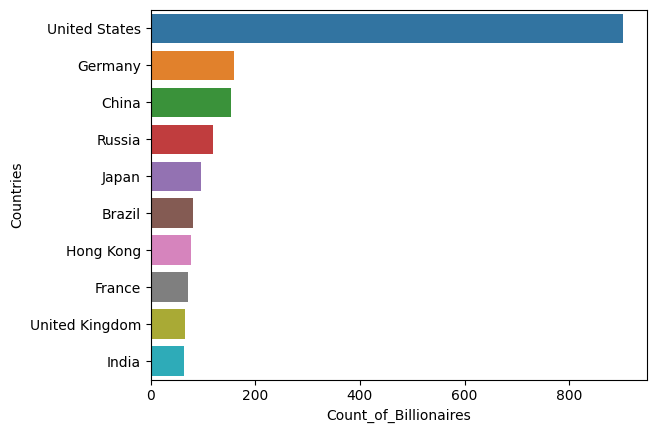

In [71]:
sns.barplot(y=top_10['Countries'], x=top_10['Count_of_Billionaires'])

## Research Question 2. 
### What industries/sectors are most successful?

In [29]:
# Group the dataframe by location, and their corresponding 'wealth.worth in billions' columns
sectors_df = data.groupby('company.sector')['wealth.worth in billions'].sum()



sectors_df.head()

company.sector
  Oil refining      57.8
 Communications     88.9
 Finance           112.8
 Oil refining       45.2
 Software          153.2
Name: wealth.worth in billions, dtype: float64

*  An overview on the results returned above indicated that there are inconsistent or inaccurate values, For example ('Oil refining' and '   Oil refining') which are the same word but inconsistent with each other. 

* This error is as a resulf of an empty space before the actual string value, and can be handled using the function "lstrip()" to renove all empty space before the values.

* Same cleaning was repeated for all values in the same "company.sector" variable using "for loop" control flow as shown in the syntax below 

In [30]:
# Checking for the number of unique values before the cleaning process.

data['company.sector'].nunique()


521

In [31]:
cleaned_company_sector = []

for sector in data['company.sector']:
    cleaned_company_sector.append(sector.lstrip())

In [35]:
# Reassign the cleaned "company.sector" and recheck the number of the unique values in the "company.sector" feature after cleaning

data['company.sector'] = cleaned_company_sector

data['company.sector'].nunique()

514

The number of unique values has reduced from 521 to 514 which indicated that the inconsistencies have been handled.

In [37]:
# Group the dataset by 'company.sector' and sum their wealth worth by sector
company_group = data.groupby('company.sector')['wealth.worth in billions'].sum()

company_group

company.sector
Banking                 13.3
Communications          88.9
Fashion                 70.6
Finance                112.8
GPS technology           4.1
                       ...  
wireless products        2.7
wool                     1.0
wrestling promotion      1.2
yogurt                   1.4
zippers                  3.5
Name: wealth.worth in billions, Length: 514, dtype: float64

In [44]:
# Rename the labels of the result returned 
company_group = company_group.rename_axis('Sectors').reset_index(name='Net_Worth')

company_group 

,Sectors,Net_Worth
0,Banking,13.3
1,Communications,88.9
2,Fashion,70.6
3,Finance,112.8
4,GPS technology,4.1
...,...,...
509,wireless products,2.7
510,wool,1.0
511,wrestling promotion,1.2
512,yogurt,1.4


In [61]:
# Sort the values by tbe networth and return the top 10 sectors

company_sector_sorted = company_group.sort_values('Net_Worth', ascending=False).head(10)



<Axes: xlabel='Net_Worth', ylabel='Sectors'>

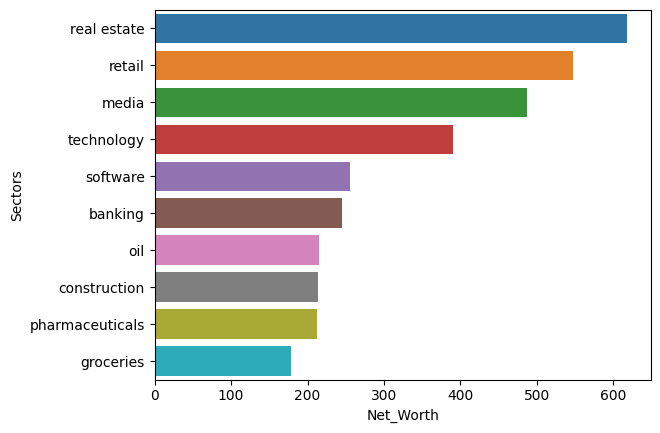

In [63]:
# Plot the distribution

sns.barplot(x='Net_Worth', y='Sectors', data=company_sector_sorted)